<a href="https://colab.research.google.com/github/AnLiMan/Grey_Wolf_Optimization/blob/main/GWO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

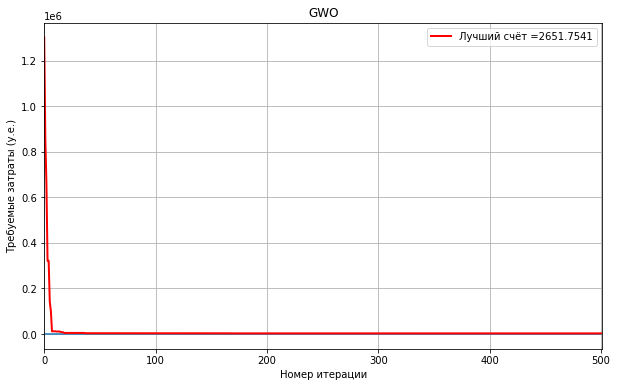

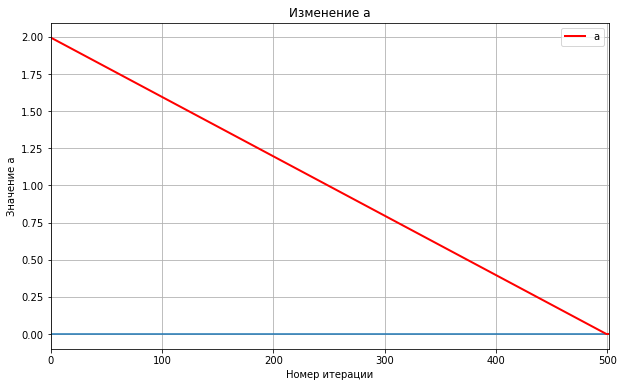

Ts = 1.254 Th = 0.0 R = 64.9413 L = 11.2382
Лучший счёт = 2651.7541


In [1]:
#---Библиотеки---
import random
import math
import matplotlib.pyplot as plt

#----Переменные---
iter_number_list = [] #Список значений х для графика
pop = 15 #Численность популяции волков
lb = [0, 0, 10, 10] #Список, нижняя граница i-го компонента равна lb[i]
ub = [99, 99, 200, 200] #Список, верхняя граница i-го компонента равна ub[i]
iter = 500 #Максимальное количество итераций
round_of_solution = 4 #До кагого знака округляем результаты оптимизации
a_list = [] #Список значений "а"

#Отрисовка графиков
def draw_figure(title, xlabel, ylabel, x, y, legend_label,  color = "r"):
    plt.figure(figsize=(10, 6))
    plt.xlim(0, len(iter_number_list))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.hlines(0, 0, len(iter_number_list))
    plt.plot(x, y, color=color, linewidth = 2, label = legend_label)
    plt.legend()
    plt.show()

#Инициализация и формулирование проблемы (см. формулы из "Pressure vessel design")
def obj(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    g1 = -x1 + 0.0193 * x3
    g2 = -x3 + 0.00954 * x3
    g3 = -math.pi * x3 ** 2 * x4 - (4/3 * math.pi * x3 ** 3 ) + 1296000
    g4 = x4 - 240
    if g1 <= 0 and g2 <= 0 and g3 <= 0 and g4 <= 0:
        return 0.6224 * x1 * x3 * x4 + 1.7781 * x2 * x3 ** 2 + 3.1661 * x1 ** 2 * x4 + 19.84 * x1 ** 2 * x3
    else:
        return 1e10

#Проверка границ
def boundary_check(x, lb, ub, dim):
    for i in range(dim):
        if x[i] < lb[i]:
            x[i] = lb[i]
        elif x[i] > ub[i]:
            x[i] = ub[i]
    return x

#Основная функция
def main(pop, lb, ub, iter):
    # Шаг 1. Инициализация
    dim = len(ub)  # размерность
    pos = []
    score = []
    iter_best = []  # Наилучшее решение каждой итерации
    for _ in range(pop):
        temp_pos = [random.uniform(lb[i], ub[i]) for i in range(dim)]
        temp_score = obj(temp_pos)
        pos.append(temp_pos)
        score.append(temp_score)
    sorted_score = sorted(score)
    alpha_score = sorted_score[0]
    alpha_pos = pos[score.index(alpha_score)].copy()
    beta_score = sorted_score[1]
    beta_pos = pos[score.index(beta_score)].copy()
    delta_score = sorted_score[2]
    delta_pos = pos[score.index(delta_score)].copy()
    iter_best.append(alpha_score)

    # Шаг 2. Основной цикл
    for t in range(iter):
        iter_number_list.append(t)
        a = 2 - 2 * (t + 1) / iter
        a_list.append(a)
        for i in range(pop):
            for j in range(dim):
                # Вычисление расстояния между альфа
                r1 = random.random()
                r2 = random.random()
                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                D_alpha = abs(C1 * alpha_pos[j] - pos[i][j])
                X1 = alpha_pos[j] - A1 * D_alpha

                # Вычисление расстояния между бета
                r1 = random.random()
                r2 = random.random()
                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                D_alpha = abs(C2 * beta_pos[j] - pos[i][j])
                X2 = beta_pos[j] - A2 * D_alpha

                # Вычисление расстояния между дельта
                r1 = random.random()
                r2 = random.random()
                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                D_alpha = abs(C3 * delta_pos[j] - pos[i][j])
                X3 = delta_pos[j] - A3 * D_alpha

                #Вычисление позиции для агента (омега)
                pos[i][j] = (X1 + X2 + X3) / 3

            # Проверка выхода за границы
            pos[i] = boundary_check(pos[i], lb, ub, dim)

            # Обновление "счёта"
            score[i] = obj(pos[i])
            if score[i] < alpha_score:
                alpha_score = score[i]
                alpha_pos = pos[i].copy()
            elif score[i] < beta_score:
                beta_score = score[i]
                beta_pos = pos[i].copy()
            elif score[i] < delta_score:
                delta_score = score[i]
                delta_pos = pos[i].copy()

        iter_best.append(alpha_score)
    iter_number_list.append(iter + 1)
    a_list.append(0)

    # Шаг 3. Вывод результатов
    draw_figure("GWO", "Номер итерации", "Требуемые затраты (у.е.)", iter_number_list, iter_best,
                "Лучший счёт =" + str(round(alpha_score, round_of_solution)))
    draw_figure("Изменение а", "Номер итерации", "Значение а", iter_number_list, a_list, "а")

    print("Ts =", round(alpha_pos[0], round_of_solution), "Th =", round(alpha_pos[1], round_of_solution + 2), "R =",
          round(alpha_pos[2], round_of_solution), "L =", round(alpha_pos[3], round_of_solution))
    print("Лучший счёт =", round(alpha_score, round_of_solution))

#----Основной код----
main(pop, lb, ub, iter)